In [465]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PyEyeSim import EyeData

In [466]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [467]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'test2.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))

(52, 9)


In [468]:

sizeX,sizeY=100,100


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid')

dataset size:  (52, 9)
presentation size:  x= 100 pixels y= 100  pixels
presentation size:  x= 100 pixels y= 100  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 4 subjects, and 1 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  4 observers and  1  stimuli.
Mean fixation number:  13.0  +/-  4.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  4
Mean X location:  41.5  +/-  2.4  pixels
Mean Y location:  49.6  +/-  0.4  pixels
Mean saccade  amplitude:  8.0  +/-  2.8  pixels
Mean scanpath  length:  83.5  +/-  8.6  pixels


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


In [469]:
Saccades = DyslexiaDat.GetSaccades()

In [470]:
for s in Saccades[0][0]:
    print(s.Angle())

11.309932474020195
348.6900675259798
21.801409486351798
0.0
291.8014094863518
63.43494882292201
291.8014094863518
0.0
0.0
338.1985905136482
11.309932474020195
303.69006752597977
45.00000000000001
0.0
326.30993247402023
18.434948822922017
329.03624346792645
38.65980825409008
0.0


In [471]:
def anglediff(s1, s2):
    # calculate the absolute difference in angles between two angles
    diff = np.abs(s1 - s2)
    # account for circular difference (angles wrap around at 360 degrees)
    return min(diff, 360 - diff)

In [472]:
def calculate_angle_differences(angles):
    angle_diffs = []
    for i in range(len(angles) - 1):
        for j in range(i + 1, len(angles)):
            diff = anglediff(angles[i], angles[j])
            angle_diffs.append(diff)
    return angle_diffs

Num Fixation: 20.0
Avg angle differences: 41.34884344759843


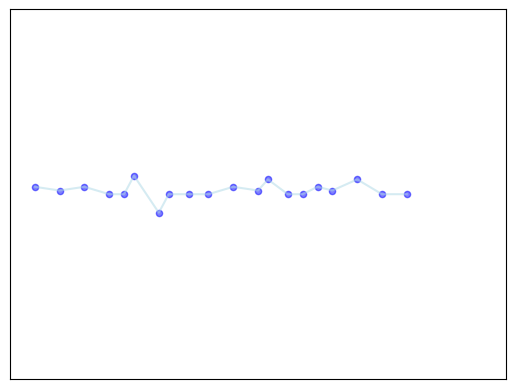

In [473]:
DyslexiaDat.VisScanPath(0,visFix=True,scan_path_col='lightblue', allS=0)
angle_diffs = calculate_angle_differences([s.Angle() for s in Saccades[0][0]])
print(f"Num Fixation: {DyslexiaDat.nfix[0][0].to_numpy()}")
print(f"Avg angle differences: {np.mean(angle_diffs)}")

Num Fixation: 15.0
Avg angle differences: 33.31319953784185


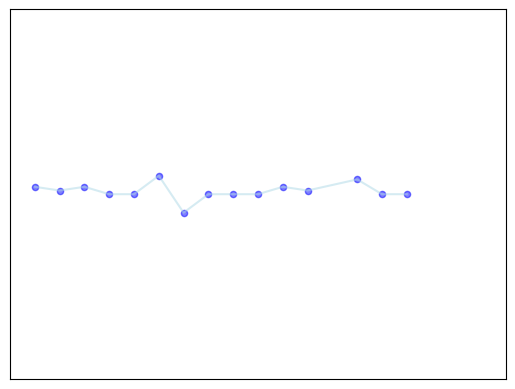

In [474]:
DyslexiaDat.VisScanPath(0,visFix=True,scan_path_col='lightblue', allS=1)
angle_diffs = calculate_angle_differences([s.Angle() for s in Saccades[1][0]])
print(f"Num Fixation: {DyslexiaDat.nfix[1][0].to_numpy()}")
print(f"Avg angle differences: {np.mean(angle_diffs)}")

Num Fixation: 10.0
Avg angle differences: 7.272145942143073


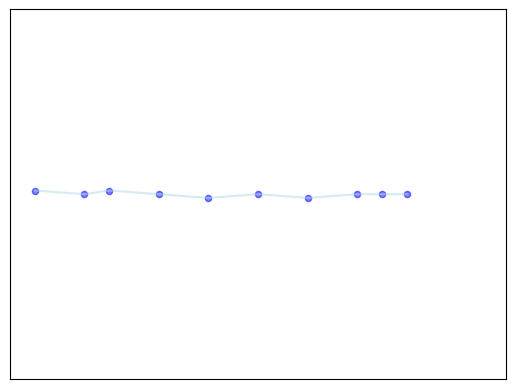

In [475]:
DyslexiaDat.VisScanPath(0,visFix=True,scan_path_col='lightblue', allS=2)
angle_diffs = calculate_angle_differences([s.Angle() for s in Saccades[2][0]])
print(f"Num Fixation: {DyslexiaDat.nfix[2][0].to_numpy()}")
print(f"Avg angle differences: {np.mean(angle_diffs)}")

Num Fixation: 7.0
Avg angle differences: 0.0


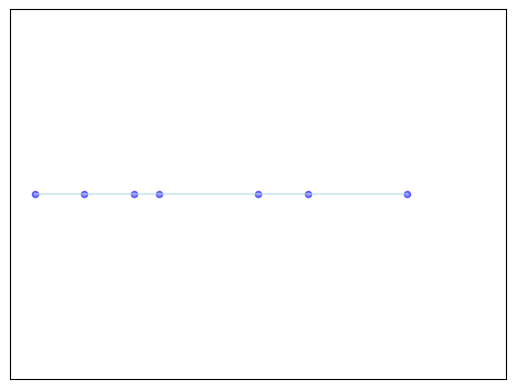

In [476]:
DyslexiaDat.VisScanPath(0,visFix=True,scan_path_col='lightblue', allS=3)
angle_diffs = calculate_angle_differences([s.Angle() for s in Saccades[3][0]])
print(f"Num Fixation: {DyslexiaDat.nfix[3][0].to_numpy()}")
print(f"Avg angle differences: {np.mean(angle_diffs)}")

In [477]:
SaccadeObj = DyslexiaDat.GetSaccades()

In [478]:
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1, minL=0)

In [479]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', Thr=0)

In [480]:
SimMatrix.shape

(4, 4, 1, 1, 1)

In [481]:
print(f'Similarity(1,2): {SimMatrix[0][1][0][0][0]}')
print(f'Similarity(1,3): {SimMatrix[0][2][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,3): {SimMatrix[1][2][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')

Similarity(1,2): 0.19838579389522237
Similarity(1,3): 0.15372569185125742
Similarity(1,4): 0.14632259060060473
Similarity(2,3): 0.12165932647918874
Similarity(2,4): 0.11362167369276585
Similarity(3,4): 0.028131784752480224


In [482]:
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')

Similarity(3,4): 0.028131784752480224
Similarity(2,4): 0.11362167369276585
Similarity(1,4): 0.14632259060060473


(sim(3,4) << sim(2,4) < sim(1,4)) = Q.E.D

---

In [483]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', Thr=0, match=True)

In [484]:
print(f'Similarity(1,2): {SimMatrix[0][1][0][0][0]}')
print(f'Similarity(1,3): {SimMatrix[0][2][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,3): {SimMatrix[1][2][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')

Similarity(1,2): 0.2998039506944742
Similarity(1,3): 0.6484492606201744
Similarity(1,4): 0.7969406940334427
Similarity(2,3): 0.4581946585214346
Similarity(2,4): 0.6533456033252897
Similarity(3,4): 0.3544836782870357


In [485]:
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')

Similarity(3,4): 0.3544836782870357
Similarity(2,4): 0.6533456033252897
Similarity(1,4): 0.7969406940334427


(sim(3,4) << sim(2,4) < sim(1,4)) = True -> Q.E.D.

---

In [486]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='cosine', Thr=5)

In [487]:
print(f'Similarity(1,2): {SimMatrix[0][1][0][0][0]}')
print(f'Similarity(1,3): {SimMatrix[0][2][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,3): {SimMatrix[1][2][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')

Similarity(1,2): 0.2107199717698648
Similarity(1,3): 0.6720433633000309
Similarity(1,4): 0.2546440075000701
Similarity(2,3): 0.6713664654969003
Similarity(2,4): 0.26970325665977846
Similarity(3,4): 0.6


In [488]:
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')

Similarity(3,4): 0.6
Similarity(1,4): 0.2546440075000701
Similarity(2,4): 0.26970325665977846


(sim(3,4) << sim(1,4) < sim(2,4)) = False

Even if cosine similarity is much more drastic, considering the scanpath 3 and 4 the same (similarity 0.0), is not ideal.

In [489]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='cosine', Thr=10)

In [490]:
print(f'Similarity(1,2): {SimMatrix[0][1][0][0][0]}')
print(f'Similarity(1,3): {SimMatrix[0][2][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,3): {SimMatrix[1][2][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')

Similarity(1,2): 0.19187796435823135
Similarity(1,3): 0.30837334020760176
Similarity(1,4): 0.2857142857142857
Similarity(2,3): 0.2821950805134974
Similarity(2,4): 0.2928932188134524
Similarity(3,4): 0.06295742866836362


In [491]:
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')

Similarity(3,4): 0.06295742866836362
Similarity(2,4): 0.2928932188134524
Similarity(1,4): 0.2857142857142857


In [492]:
SimMatrix[1][3][0][0][0] - SimMatrix[2][3][0][0][0]

0.2299357901450888

----

In [512]:
from scipy.spatial.distance import cosine
def CosineSim(saccades1,saccades2,Thr):
   
    bin_edges = np.linspace(0, 360, int(360/Thr)+1)  # 36 bins of 10° each + endpoint
    
    # Compute histograms (normalize to get probability distributions)
    hist1, _ = np.histogram(saccades1, bins=bin_edges, density=True)
    hist2, _ = np.histogram(saccades2, bins=bin_edges, density=True)
        
    # Compute cosine similarity
    return  cosine(hist1, hist2)
    

In [513]:
saccades1 = [s.Angle() for s in Saccades[0][0]]
saccades2 = [s.Angle() for s in Saccades[1][0]]
saccades3 = [s.Angle() for s in Saccades[2][0]]
saccades4 = [s.Angle() for s in Saccades[3][0]]

In [514]:
Thr = 5

In [534]:
bin_edges = np.linspace(0, 360, int(360/Thr)+1)  # 36 bins of 5° each + endpoint

In [516]:
hist1, _ = np.histogram(saccades3, bins=bin_edges, density=True)
hist2, _ = np.histogram(saccades4, bins=bin_edges, density=True)

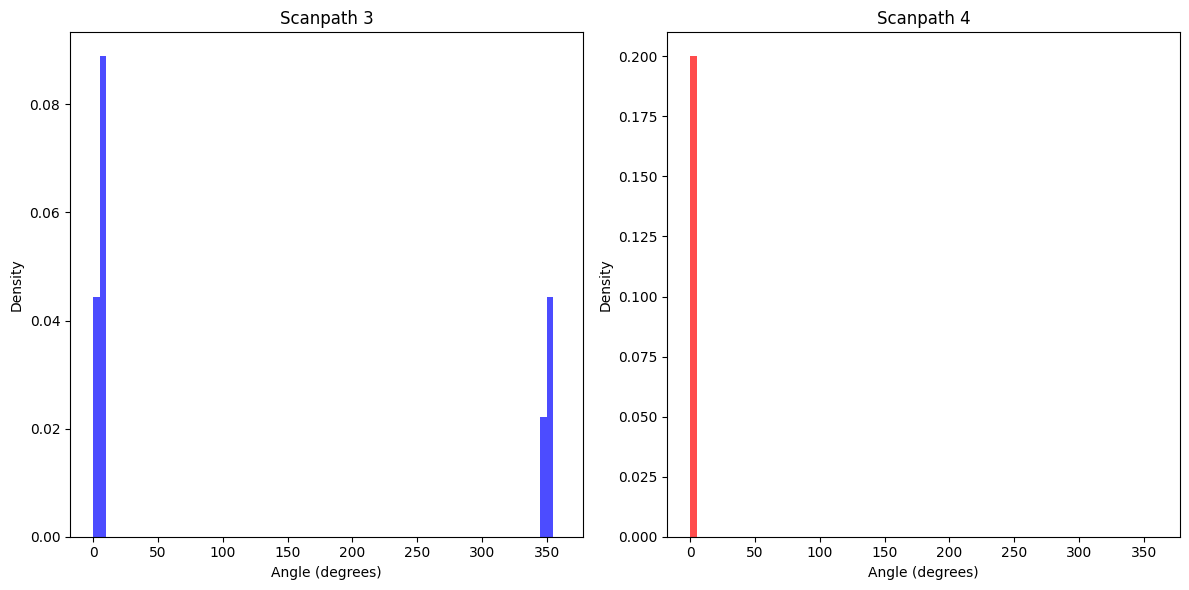

In [517]:
# plot histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist1, width=np.diff(bin_edges), align='edge', alpha=0.7, color='b')
plt.title('Scanpath 3')
plt.xlabel('Angle (degrees)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.bar(bin_edges[:-1], hist2, width=np.diff(bin_edges), align='edge', alpha=0.7, color='r')
plt.title('Scanpath 4')
plt.xlabel('Angle (degrees)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [518]:
hist1, _ = np.histogram(saccades1, bins=bin_edges, density=True)
hist2, _ = np.histogram(saccades2, bins=bin_edges, density=True)

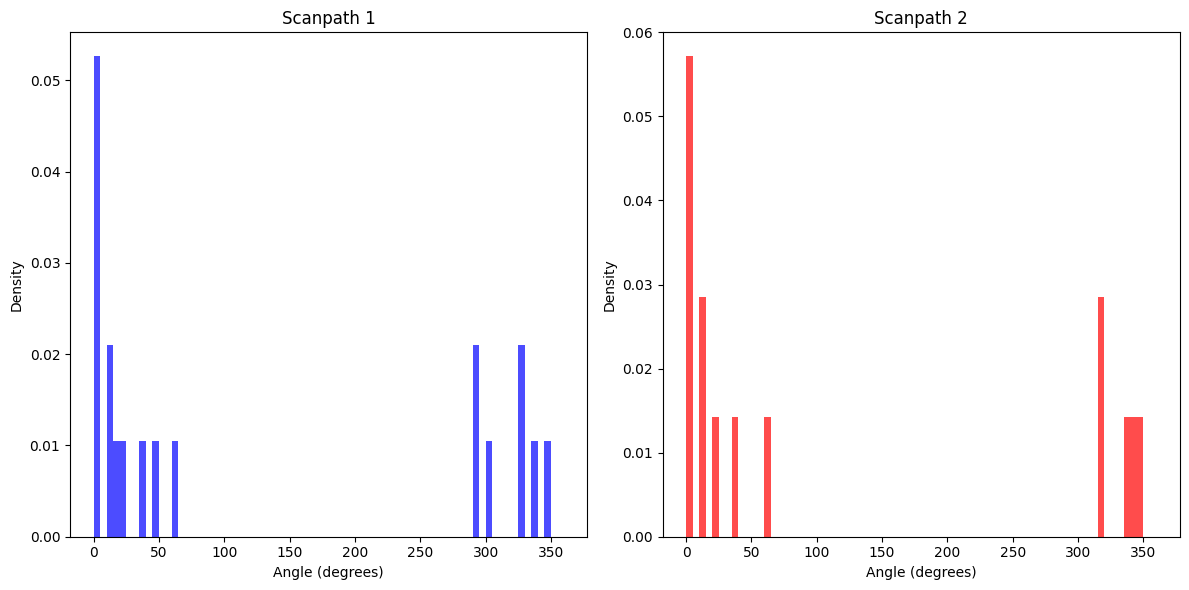

In [519]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist1, width=np.diff(bin_edges), align='edge', alpha=0.7, color='b')
plt.title('Scanpath 1')
plt.xlabel('Angle (degrees)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.bar(bin_edges[:-1], hist2, width=np.diff(bin_edges), align='edge', alpha=0.7, color='r')
plt.title('Scanpath 2')
plt.xlabel('Angle (degrees)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [528]:
Thr = 10

In [535]:
bin_edges = np.linspace(0, 360, int(360/Thr)+1)  # 36 bins of 10° each + endpoint

In [536]:
hist1, _ = np.histogram(saccades3, bins=bin_edges, density=True)
hist2, _ = np.histogram(saccades4, bins=bin_edges, density=True)

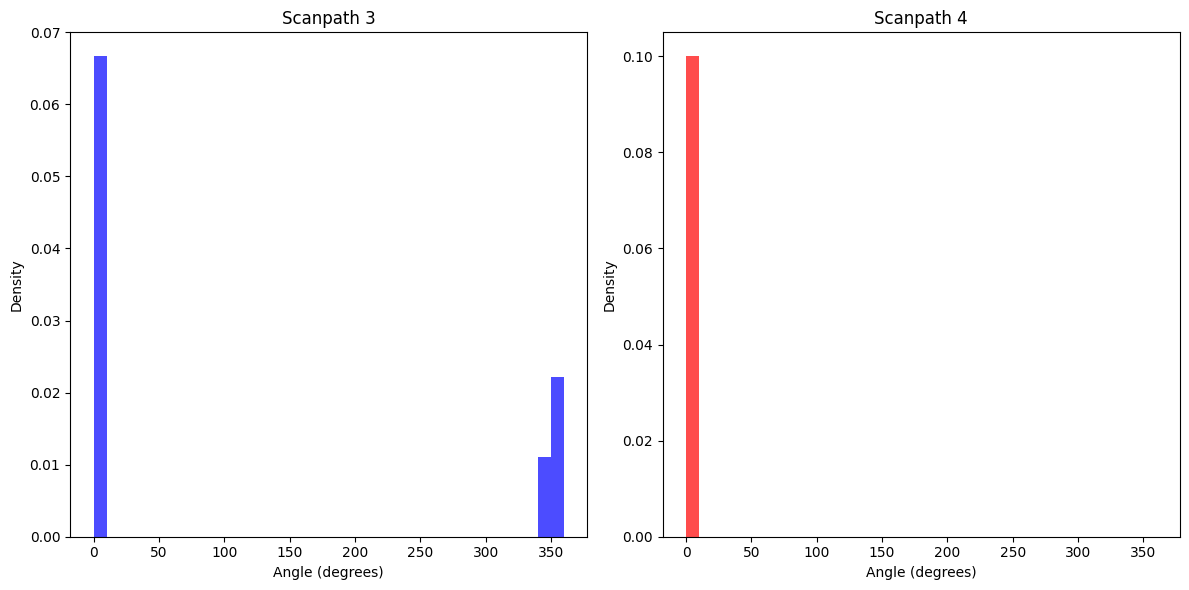

In [537]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist1, width=np.diff(bin_edges), align='edge', alpha=0.7, color='b')
plt.title('Scanpath 3')
plt.xlabel('Angle (degrees)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.bar(bin_edges[:-1], hist2, width=np.diff(bin_edges), align='edge', alpha=0.7, color='r')
plt.title('Scanpath 4')
plt.xlabel('Angle (degrees)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [538]:
hist1, _ = np.histogram(saccades1, bins=bin_edges, density=True)
hist2, _ = np.histogram(saccades2, bins=bin_edges, density=True)

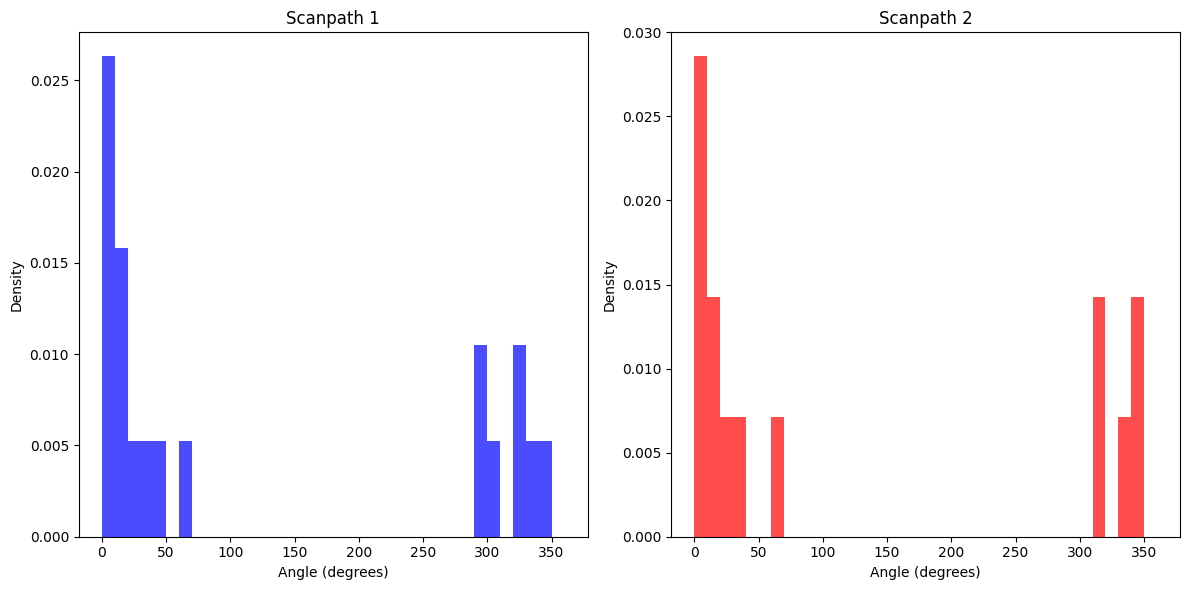

In [539]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist1, width=np.diff(bin_edges), align='edge', alpha=0.7, color='b')
plt.title('Scanpath 1')
plt.xlabel('Angle (degrees)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.bar(bin_edges[:-1], hist2, width=np.diff(bin_edges), align='edge', alpha=0.7, color='r')
plt.title('Scanpath 2')
plt.xlabel('Angle (degrees)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()